# Annual Averaged Hazard Score - Wind

In this exercise we perform the calculation of the AAHS for Wind in the Natanebi river basin. 

We first load useful libraries

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c
import xarray as xr
from wrf import (getvar, interplevel, to_np, latlon_coords, CoordPair, xy_to_ll, ll_to_xy)
from scipy.interpolate import griddata
import geopandas as gp
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Then, we load the wind NetCDF file provided with wind speed at a national level. 

In [3]:
d10_file = './DATA/Wind_2023_exceedance_new_thresholds_and_rp.nc'
ds       = xr.open_dataset(d10_file)

We assign to each pixel the intensity level associated with each wind speed interval

In [4]:
i2 = ds.isel(rp=0).Max_Vel
none2 = np.where(i2<14)
low2 = np.where((i2>14) & (i2<20))
med2 = np.where((i2>20) & (i2<30))
high2 = np.where(i2>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i2[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i2[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i2[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i2[pairx][pairy]=3 

For the 5 year return period: 

In [5]:
i5 = ds.isel(rp=1).Max_Vel
none2 = np.where(i5<14)
low2 = np.where((i5>14) & (i5<20))
med2 = np.where((i5>20) & (i5<30))
high2 = np.where(i5>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i5[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i5[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i5[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i5[pairx][pairy]=3

For the 10 year return period

In [6]:
i10 = ds.isel(rp=2).Max_Vel
none2 = np.where(i10<14)
low2 = np.where((i10>14) & (i10<20))
med2 = np.where((i10>20) & (i10<30))
high2 = np.where(i10>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i10[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i10[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i10[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i10[pairx][pairy]=3 

For the 20 year return period

In [7]:
i20 = ds.isel(rp=3).Max_Vel
none2 = np.where(i20<14)
low2 = np.where((i20>14) & (i20<20))
med2 = np.where((i20>20) & (i20<30))
high2 = np.where(i20>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i20[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i20[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i20[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i20[pairx][pairy]=3

For the 50 year return period

In [8]:
i50 = ds.isel(rp=4).Max_Vel
none2 = np.where(i50<14)
low2 = np.where((i50>14) & (i50<20))
med2 = np.where((i50>20) & (i50<30))
high2 = np.where(i50>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i50[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i50[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i50[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i50[pairx][pairy]=3

For the 100 year return period

In [9]:
i100 = ds.isel(rp=5).Max_Vel
none2 = np.where(i100<14)
low2 = np.where((i100>14) & (i100<20))
med2 = np.where((i100>20) & (i100<30))
high2 = np.where(i100>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i100[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i100[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i100[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i100[pairx][pairy]=3

For the 200 year return period

In [10]:
i200 = ds.isel(rp=6).Max_Vel
none2 = np.where(i200<14)
low2 = np.where((i200>14) & (i200<20))
med2 = np.where((i200>20) & (i200<30))
high2 = np.where(i200>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i200[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i200[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i200[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i200[pairx][pairy]=3

For the 500 year return period

In [11]:
i500 = ds.isel(rp=7).Max_Vel
none2 = np.where(i500<14)
low2 = np.where((i500>14) & (i500<20))
med2 = np.where((i500>20) & (i500<30))
high2 = np.where(i500>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i500[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i500[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i500[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i500[pairx][pairy]=3

For the 1000 year return period

In [12]:
i1000 = ds.isel(rp=8).Max_Vel
none2 = np.where(i1000<14)
low2 = np.where((i1000>14) & (i1000<20))
med2 = np.where((i1000>20) & (i1000<30))
high2 = np.where(i1000>30)
for kk in range(0,len(none2[0])):
    pairx=none2[0][kk]
    pairy=none2[1][kk]
    i1000[pairx][pairy]=0
for kk in range(0,len(low2[0])):
    pairx=low2[0][kk]
    pairy=low2[1][kk]
    i1000[pairx][pairy]=1
for kk in range(0,len(med2[0])):
    pairx=med2[0][kk]
    pairy=med2[1][kk]
    i1000[pairx][pairy]=2
for kk in range(0,len(high2[0])):
    pairx=high2[0][kk]
    pairy=high2[1][kk]
    i1000[pairx][pairy]=3

We now define the axis with the return periods that will turn into exceedance probabilities

In [13]:
x = [2,5,10,20,50,100,200,500,1000]
x = [1/i for i in x]

A new array will contain the resulting exceedance probabilities

In [14]:
output = i2

We calculate for each pixel the corresponding exceedance probability at each return period based on the intensity levels. 

In [15]:
for jj in range(0,len(i2)):
    for ii in range(0,len(i2[0])):
        pairy = [i2[jj][ii],i5[jj][ii],i10[jj][ii],i20[jj][ii],i50[jj][ii],i100[jj][ii],i200[jj][ii],i500[jj][ii],i1000[jj][ii]]
        yprima = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
        for kk in range(0,5):
            if kk in pairy: 
                indi = pairy.index(kk)
                yprima[kk]=x[indi]
            else: 
                yprima[kk]=0.5
           
        diff = [x-0.5 for x in yprima]
        
        store=[]
        for cc in range(0,9):
            check = diff[cc]<0
            if check == True: 
                store.append(cc)
            
        if len(store)!=0: 
            for uu in range(store[-1],len(yprima)-1): 
                yprima[uu+1]= 0
        else: 
                yprima=[0,0,0,0,0]

        output[jj][ii]=np.sum(yprima)

We now turn the Lambert Conical projection into regular lat/lon, having in mind that we have to later put all the hazards under the same grid coordinates.

In [16]:
lats, lons = latlon_coords(output)

We define the new set of coordinates

In [17]:
Yi = np.linspace(np.min(lats.data),float(np.max(lats.data)),len(lats))
Xi = np.linspace(np.min(lons.data),float(np.max(lons.data)),len(lons[0]))
X, Y = np.meshgrid(Xi,Yi)

We project onto the new coordinates

In [18]:
nvals = griddata((lons.values.ravel(),
                                    lats.values.ravel()),
                                    output.values.ravel(),
                                    (X,Y),
                                    method='linear')

We now restrict the extension to the Natanebi river basin boundaries

In [19]:
df = gp.read_file('./DATA/NataEPSG.shp')
x_min, y_min, x_max, y_max = df.total_bounds

And we plot the AAHS from our calculation method

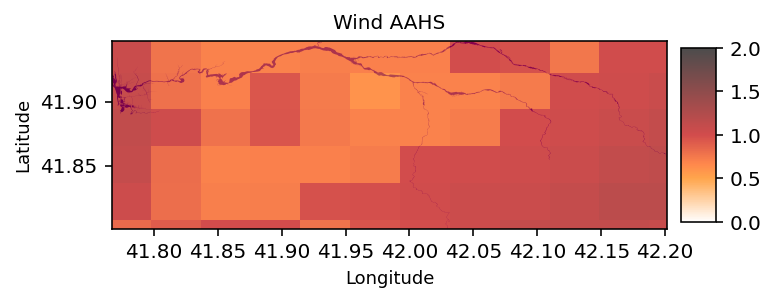

In [20]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(y_min,y_max)
ax.set_xlim(x_min,x_max)
ax.set_title('Wind AAHS', fontsize=10,linespacing=4.2)
ax.set_xlabel('Longitude', fontsize=9,linespacing=4.2)
ax.set_ylabel('Latitude', fontsize=9)
df.plot(ax=ax, color='blue', edgecolor='none',linewidth=.2,aspect=1)
# df.plot(ax=ax, color='white', edgecolor='black',linewidth=.2,aspect=1)
cmap = plt.get_cmap('gist_heat_r')
mesh = ax.pcolormesh(Xi,Yi,nvals,vmin=0, vmax=2,alpha=0.7, cmap=cmap);
plt.colorbar(mesh, ax=ax, shrink=.4, pad=.02, aspect=5)
plt.show()

In [21]:
output.to_netcdf("./OUTPUT/natanebi_AAHS_wind.nc")